In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [86]:
df=pd.read_csv('/kaggle/input/car-price-dataset/car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


****To check is there any null value in the featured dataset:****

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


OR

In [48]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

****df.describe() is a method in pandas, a Python library for data manipulation and analysis. It provides a summary of descriptive statistics for numerical columns in a DataFrame (df).****

In [49]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


****Explanation of the Output:
count: Number of non-null values.
mean: Average of the column.
std: Standard deviation (measure of spread).
min: Minimum value.
25% (Q1): First quartile (25th percentile).
50% (Q2/Median): Middle value.
75% (Q3): Third quartile (75th percentile).
max: Maximum value.
This is useful for quickly analyzing data before applying machine learning models. Let me know if you need further clarification****

In [50]:
df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [74]:
print(df['Fuel_Type'].value_counts())

Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64


****The code print(df['Fuel_Type'].value_counts()) is used in pandas to count the occurrences of each unique value in the column 'Fuel_Type' of the DataFrame df****

In [87]:
print(df['Transmission'].value_counts())

Transmission
Manual            3372
Automatic         3317
Semi-Automatic    3311
Name: count, dtype: int64


**Visualize the selling price again categorical data by matplotlib****

In [76]:
fuel_type=df["Fuel_Type"]
transmission=df["Transmission"]
Selling_price=df["Price"]

In [54]:
from matplotlib import style

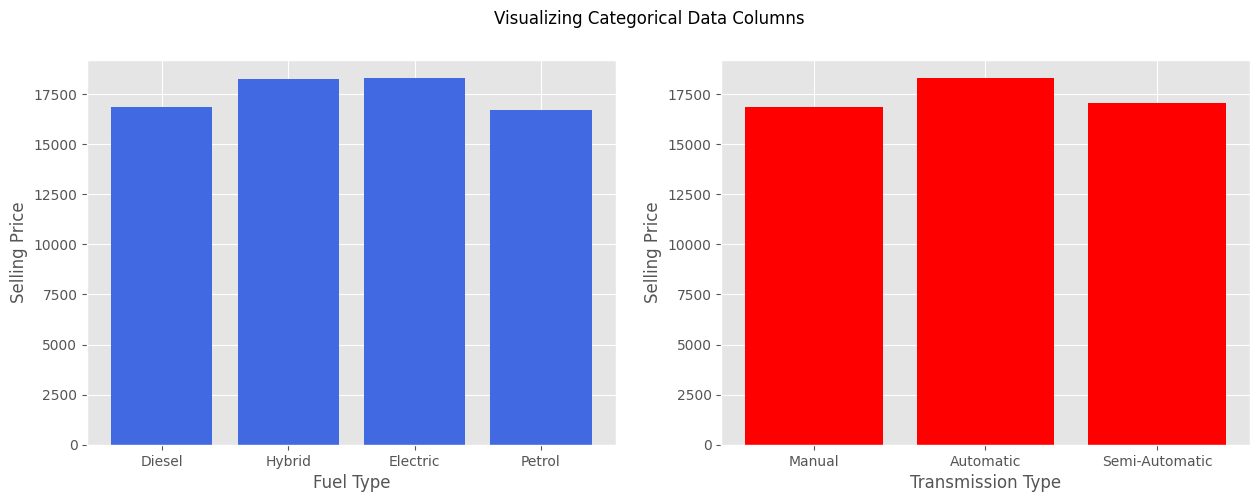

In [55]:
style.use('ggplot')
fig=plt.figure(figsize=(15,5))
fig.suptitle('Visualizing Categorical Data Columns')
plt.subplot(1,2,1)
plt.bar(fuel_type,Selling_price,color="royalblue")
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.subplot(1,2,2)
plt.bar(transmission,Selling_price,color="red")
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

****Visualize the selling price again categorical data by seaborn****

<Axes: xlabel='Transmission', ylabel='Price'>

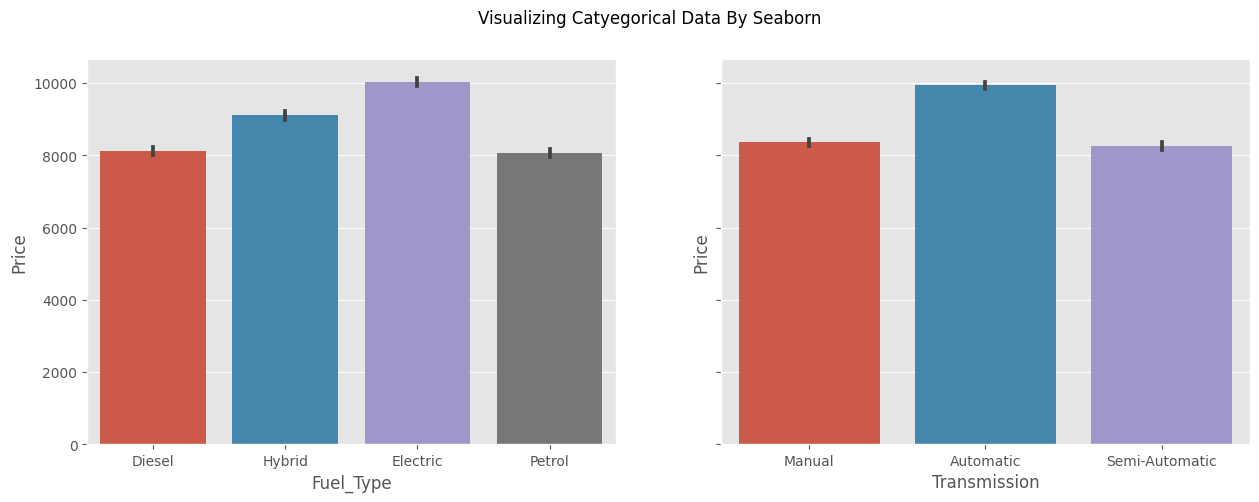

In [56]:
fig,axes=plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing Catyegorical Data By Seaborn')
sns.barplot(x=fuel_type,y=Selling_price,ax=axes[0])
sns.barplot(x=transmission,y=Selling_price,ax=axes[1])

In [88]:
petrol_data=df.groupby('Fuel_Type').get_group('Hybrid')
petrol_data.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,2011.416633,2.997187,145577.587036,3.497350,2.997962,9113.030167
std,6.969117,1.146768,87505.577771,1.122445,1.433830,3055.538900
min,2000.000000,1.000000,88.000000,2.000000,1.000000,2000.000000
25%,2005.000000,2.000000,69400.000000,2.000000,2.000000,6955.000000
50%,2011.000000,3.000000,142032.000000,4.000000,3.000000,9110.000000
75%,2018.000000,4.000000,222441.000000,5.000000,4.000000,11343.000000
max,2023.000000,5.000000,299818.000000,5.000000,5.000000,18255.000000


In [89]:
tm_type=df.groupby('Transmission').get_group('Manual')
tm_type.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000
mean,2011.520166,3.003351,148898.322657,3.492883,2.970937,8363.426157
std,6.934700,1.144851,87445.734448,1.114191,1.421656,3019.758983
min,2000.000000,1.000000,178.000000,2.000000,1.000000,2000.000000
25%,2006.000000,2.000000,71707.000000,3.000000,2.000000,6159.500000
50%,2011.000000,3.000000,149341.000000,3.000000,3.000000,8341.500000
75%,2018.000000,4.000000,224638.500000,4.000000,4.000000,10514.500000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,16844.000000


In [90]:
#manual coding
df.replace({'Fuel_Type':{'Diesel':0,'Electric':1,'Petrol':2,'Hybrid':3}},inplace=True)
df


<ipython-input-90-5c583fb86e85>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Diesel':0,'Electric':1,'Petrol':2,'Hybrid':3}},inplace=True)


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,0,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,3,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,0,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,1,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,3,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,0,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,1,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,2,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,3,Automatic,225772,4,1,4084


In [91]:
df.drop(['Model','Brand','Doors'],axis='columns',inplace=True)
df.head()

,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Owner_Count,Price
0,2020,4.2,0,Manual,289944,5,8501
1,2012,2.0,3,Automatic,5356,3,12092
2,2020,4.2,0,Automatic,231440,2,11171
3,2023,2.0,1,Manual,160971,1,11780
4,2003,2.6,3,Semi-Automatic,286618,3,2867


In [95]:
df.Transmission.value_counts()

Transmission
Manual            3372
Automatic         3317
Semi-Automatic    3311
Name: count, dtype: int64

In [96]:
df.replace({'Transmission':{'Manual':0,'Automatic':1,'Semi-Automatic':2}},inplace=True)
df

<ipython-input-96-975207e97b48>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Transmission':{'Manual':0,'Automatic':1,'Semi-Automatic':2}},inplace=True)


,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Owner_Count,Price
0,2020,4.2,0,0,289944,5,8501
1,2012,2.0,3,1,5356,3,12092
2,2020,4.2,0,1,231440,2,11171
3,2023,2.0,1,0,160971,1,11780
4,2003,2.6,3,2,286618,3,2867
...,...,...,...,...,...,...,...
9995,2004,3.7,0,2,5794,4,8884
9996,2002,1.4,1,1,168000,1,6240
9997,2010,3.0,2,1,86664,1,9866
9998,2002,1.4,3,1,225772,1,4084


****Plot a heatmap to find a correlation between different columns****

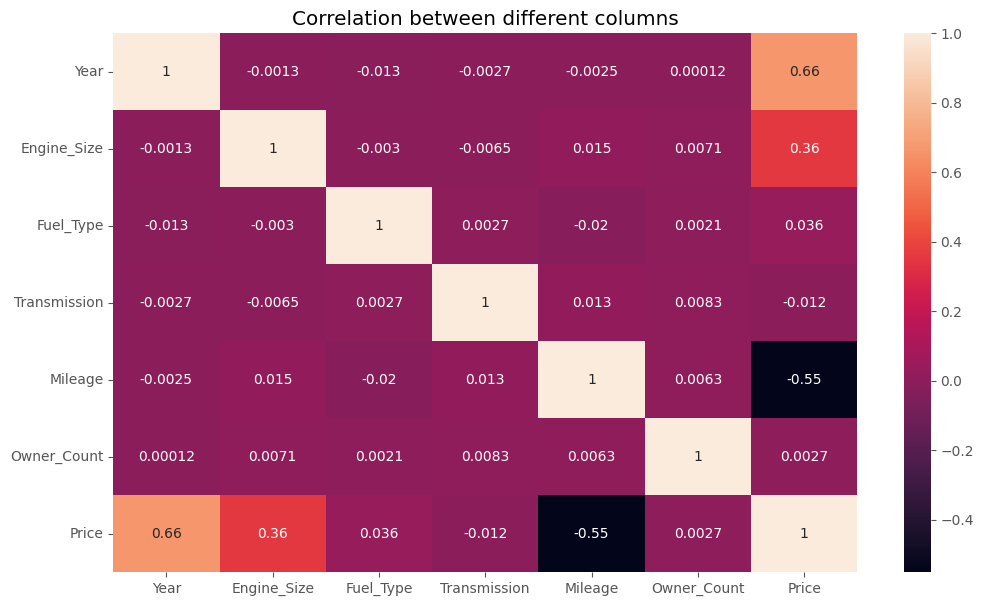

In [106]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between different columns")
plt.show()


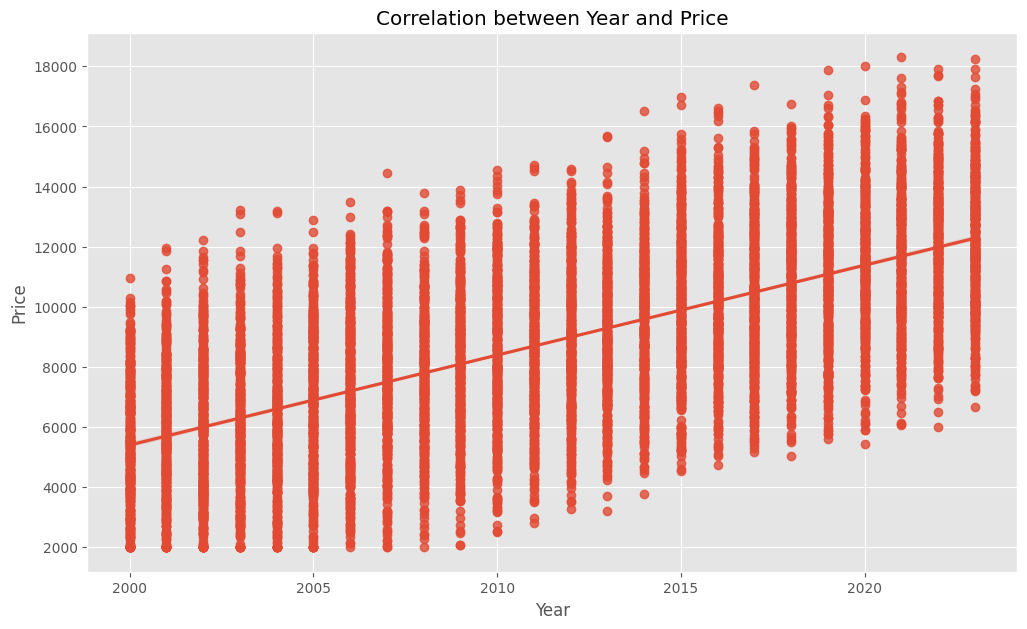

In [103]:
plt.figure(figsize=(12,7))
plt.title("Correlation between Year and Price")
sns.regplot(x='Year',y='Price',data=df)
plt.show()

In [122]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [123]:
 print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (10000, 6)
Shape of y:  (10000,)


In [153]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=42)

In [162]:
print("X train shape ",X_train.shape)
print("X test shape ",X_test.shape)
print("y train shape ",y_train.shape)
print("y test shape ",y_test.shape)

X train shape  (9500, 6)
X test shape  (500, 6)
y train shape  (9500,)
y test shape  (500,)


****Normalization of data****

In [163]:
scaler=StandardScaler()

In [164]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [165]:
model=LinearRegression()

In [166]:
model.fit(X_train,y_train)

LinearRegression()

In [167]:
predict=model.predict(X_test)


In [160]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [168]:
print("MAE: ",(metrics.mean_absolute_error(predict,y_test)))
print("MSE: ",(metrics.mean_squared_error(predict,y_test))) 
print("R2_score: ",(metrics.r2_score(predict,y_test)))

MAE:  900.7763730504311
MSE:  1103635.7539696964
R2_score:  0.867979667853362


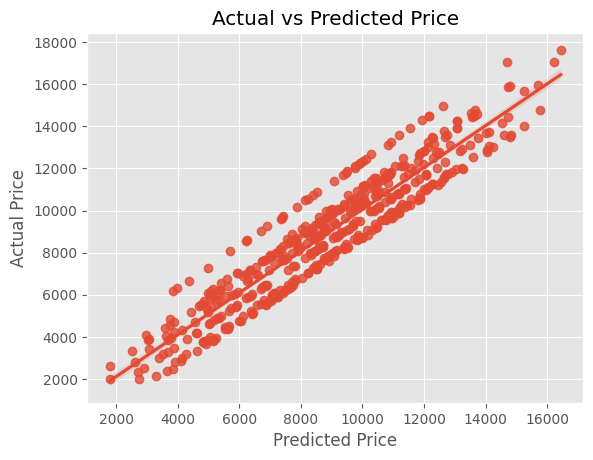

In [169]:
sns.regplot(x=predict,y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()